# Set up

In [48]:
import numpy as np
import sys
import os
import glob
import importlib
import math as m
import pickle as pickle
import seaborn as sns
import statistics
import pandas as pd
fmts = ['svg','pdf']
from scipy.stats import norm, wilcoxon, ttest_rel, friedmanchisquare, shapiro
from scipy import signal, fft
from scipy.optimize import curve_fit, minimize
import matplotlib # produce matlab-style plots
from matplotlib import animation as ani # animation
import matplotlib.pyplot as plt # Matlab-style plotting
from matplotlib import rcParams
matplotlib.rc('font',**{'size':20}) # increase font size on plots
matplotlib.rc('text',usetex=False) # use LaTeX to render symbols
matplotlib.rc('animation',html='html5') # render animation
font = {#'family' : 'normal',
        'weight' : 'ultralight',
        'size'   : 14}
matplotlib.rc('font', **font)
rcParams['axes.titlesize'] = 16
rcParams['font.weight'] = 'ultralight'
rcParams['font.family'] = 'sans-serif'
rcParams['mathtext.fontset'] = 'cm'
prop_cycle = plt.rcParams['axes.prop_cycle']
python_colors = prop_cycle.by_key()['color'] # python default color cycle

# auto reload modules
%load_ext autoreload
%autoreload 2
sys.path.append('C:\\Users\\burdenlab\\Documents\\GitHub\\sensorimotor_fusion\\analysis\\Multimodal paper') # change this for your computer
# DATA_PATH = 'C:\\Users\\amber\\Documents\\GitHub\\sensorimotor_fusion' #change this for your computer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
from globalVars import *
from collect_data import findFilename, getrawdata, get_data, analyze
from analysis import *

In [50]:
print('data length = ',N)
print('primes = ',primes)
print('base freq = ',base_freq)
print('IX = ',IX)
print('Even_IX = ',Even_IX)
print('Odd_IX = ',Odd_IX)
print('freqs = ',freqs)
print('omegas = ',omegas)
print('T = ',T) # total time 40 seconds
print('t = ',t) # timestamps
print('fs = ',fs)
print('sample_period (dt)= ',dt)
print('xf = ',xf) # frequency domain x-axis, shape (N//2,)
print('Machine = ',M) # soM at stimulated freqs
print('scaleInput = ',scaleInput)
print('scaleOutputScreen = ',scaleOutputScreen)

data length =  2400
primes =  [ 2  3  5  7 11 13 17 19]
base freq =  0.05
IX =  [ 4  6 10 14 22 26 34 38]
Even_IX =  [ 6 14 26 38]
Odd_IX =  [ 4 10 22 34]
freqs =  [0.1  0.15 0.25 0.35 0.55 0.65 0.85 0.95]
omegas =  [0.62831853 0.9424778  1.57079633 2.19911486 3.45575192 4.08407045
 5.34070751 5.96902604]
T =  40
t =  [0.00000000e+00 1.66736140e-02 3.33472280e-02 ... 3.99666528e+01
 3.99833264e+01 4.00000000e+01]
fs =  60
sample_period (dt)=  0.016666666666666666
xf =  [0.0000e+00 2.5000e-02 5.0000e-02 ... 2.9925e+01 2.9950e+01 2.9975e+01]
Machine =  [-0.7169568 -1.14107219j -0.52958685-0.5619091j  -0.28840044-0.18360142j
 -0.17134712-0.0779164j  -0.07726649-0.02235881j -0.05656227-0.01384948j
 -0.03387172-0.00634218j -0.02730057-0.00457371j]
scaleInput =  0.04616974606700115
scaleOutputScreen =  0.25


# Load Data

In [51]:
# with open('multimodal_data.pkl', 'wb') as file:
#     pickle.dump(ALLdata, file)

# Load the array from the file
with open('multimodal_data.pkl', 'rb') as file:
    Rs,Ds,MDs,Us,U0s,U1s,Ys,rs,ds,mds,us,u0s,u1s,ys,errors,Tur,Tu0r,Tu1r,Tud,Tu0d,Tu1d,Tyr,Tyd,F,B,F0,F1,B0,B1 = pickle.load(file)
# 0 is EMG pathyway, 1 is manual pathway

In [52]:
print(Rs.shape) # subject x condition x trial x all freqs
print(rs.shape) # subject x condition x trial x timestamps
print(errors.shape) # subject x condition x trial

subject_num = Rs.shape[0]
condition_num = Rs.shape[1]
trial_num = Rs.shape[2]
print('subject_num = ',subject_num)
print('condition_num (alphas) = ',condition_num)
print('trial_num = ',trial_num)
alphas = np.array([0,0.25,0.5,0.75,1])
conditions = ['0','0.25','0.5','0.75','1']

(15, 5, 14, 2400)
(15, 5, 14, 2400)
(15, 5, 14)
subject_num =  15
condition_num (alphas) =  5
trial_num =  14


# Error v Num Trials

In [53]:
errors[:,2,:].shape

(15, 14)

In [54]:
np.quantile(errors[:,2,:],[0.25,0.5,0.75],axis = 0).shape

(3, 14)

(15, 5, 14)


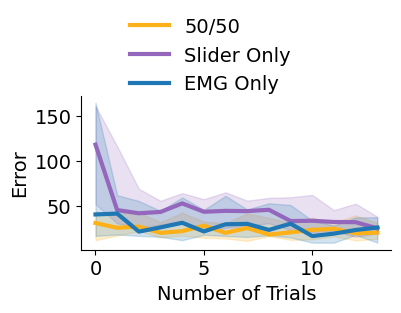

In [55]:
print(errors.shape) # plot x axis is trials and y is errors, for one condition

num_trials = np.arange(0, 14)

fig,ax = plt.subplots(figsize=(4,2))
ax.set_ylabel('Error')
ax.set_xlabel('Number of Trials')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# magnitude
q25,q50,q75 = np.quantile(errors[:,2,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = '50/50',color = colors['GOLD'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['GOLD'])

q25,q50,q75 = np.quantile(errors[:,0,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = 'Slider Only',color = colors['PURPLE'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['PURPLE'])

q25,q50,q75 = np.quantile(errors[:,4,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = 'EMG Only',color = colors['BLUE'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['BLUE'])

ax.legend(bbox_to_anchor = (0.1,0.9), ncol=1, frameon=False)
plt.show()

# FF EMG, Slider, 50/50

In [56]:
print(np.abs(F).shape)

(15, 5, 7, 8)


(15, 5, 14)


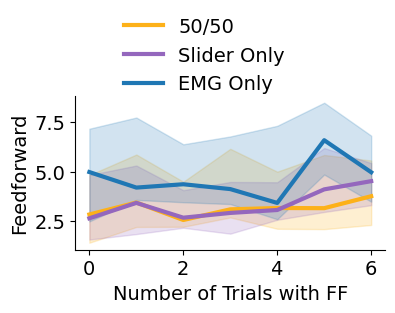

In [57]:
print(errors.shape) # plot x axis is trials and y is errors, for one condition

num_trials = np.arange(0, 7)

fig,ax = plt.subplots(figsize=(4,2))
mean_F = np.mean(np.abs(F),axis = 3)
ax.set_ylabel('Feedforward')
ax.set_xlabel('Number of Trials with FF')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# magnitude
q25,q50,q75 = np.quantile(mean_F[:,2,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = '50/50',color = colors['GOLD'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['GOLD'])

q25,q50,q75 = np.quantile(mean_F[:,0,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = 'Slider Only',color = colors['PURPLE'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['PURPLE'])

q25,q50,q75 = np.quantile(mean_F[:,4,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = 'EMG Only',color = colors['BLUE'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['BLUE'])

ax.legend(bbox_to_anchor = (0.1,0.9), ncol=1, frameon=False)
plt.show()

# FB EMG, Slider, 50/50

(15, 5, 14)


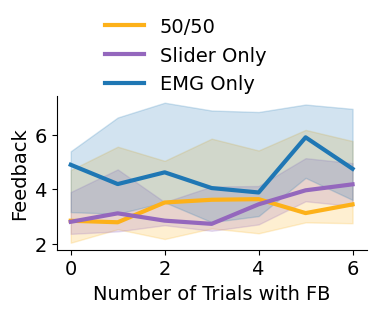

In [58]:
print(errors.shape) # plot x axis is trials and y is errors, for one condition

num_trials = np.arange(0, 7)

fig,ax = plt.subplots(figsize=(4,2))
mean_B = np.mean(np.abs(B),axis = 3)
ax.set_ylabel('Feedback')
ax.set_xlabel('Number of Trials with FB')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


q25,q50,q75 = np.quantile(mean_B[:,2,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = '50/50',color = colors['GOLD'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['GOLD'])

q25,q50,q75 = np.quantile(mean_B[:,0,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = 'Slider Only',color = colors['PURPLE'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['PURPLE'])

q25,q50,q75 = np.quantile(mean_B[:,4,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = 'EMG Only',color = colors['BLUE'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['BLUE'])

ax.legend(bbox_to_anchor = (0.1,0.9), ncol=1, frameon=False)
plt.show()

# FF EMG Pathways

(15, 5, 14)


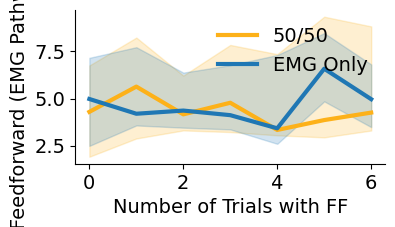

In [59]:
print(errors.shape) # plot x axis is trials and y is errors, for one condition

num_trials = np.arange(0, 7)

fig,ax = plt.subplots(figsize=(4,2))
mean_F0 = np.mean(np.abs(F0),axis = 3) # across subjects

ax.set_ylabel('Feedforward (EMG Pathways)')
ax.set_xlabel('Number of Trials with FF')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# FF EMG Pathways
q25,q50,q75 = np.quantile(mean_F0[:,2,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = '50/50',color = colors['GOLD'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['GOLD'])

q25,q50,q75 = np.quantile(mean_F[:,4,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = 'EMG Only',color = colors['BLUE'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['BLUE'])

ax.legend(ncol=1, frameon=False, loc = 'upper right')
plt.show()

# FF (Slider Pathyways)

(15, 5, 14)


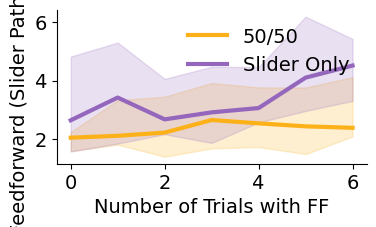

In [60]:
print(errors.shape) # plot x axis is trials and y is errors, for one condition

num_trials = np.arange(0, 7)

fig,ax = plt.subplots(figsize=(4,2))
mean_F1 = np.mean(np.abs(F1),axis = 3) 
ax.set_ylabel('Feedforward (Slider Pathways)')
ax.set_xlabel('Number of Trials with FF')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# FF Slider Pathways
q25,q50,q75 = np.quantile(mean_F1[:,2,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = '50/50',color = colors['GOLD'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['GOLD'])

q25,q50,q75 = np.quantile(mean_F[:,0,:],[0.25,0.5,0.75],axis = 0) # across subjects
ax.plot(num_trials,q50,'-',label = 'Slider Only',color = colors['PURPLE'],linewidth = 3)
ax.fill_between(num_trials, q25, q75, alpha=0.2,color = colors['PURPLE'])

ax.legend(ncol=1, frameon=False, loc = 'upper right')
plt.show()